In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [441]:
df = pd.read_csv("weight-height (1) - weight-height (1).csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [442]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [443]:
df.isna().sum() 
df.duplicated().sum()


np.int64(0)

In [444]:
from pandas.api.types import is_numeric_dtype

In [445]:
mms = MinMaxScaler()
le = LabelEncoder()

In [446]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    df[col] =  mms.fit_transform(df[[col]])
  else:
    df[col] = le.fit_transform(df[col])

In [447]:
df.head()

,Gender,Height,Weight
0,1,0.744399,0.862415
1,1,0.548328,0.472703
2,1,0.754583,0.719657
3,1,0.662487,0.755412
4,1,0.590905,0.688360


In [448]:
y = df[['Gender']]
x = df.drop(['Gender'], axis=1)

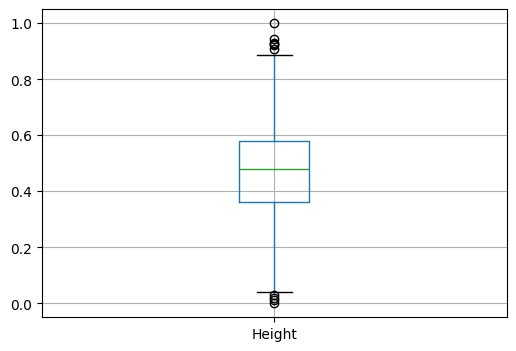

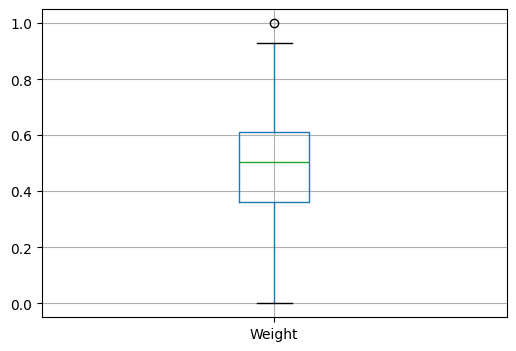

In [449]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    plt.figure(figsize=(6,4))
    x.boxplot(column=[col])

## Handeling Outliers

In [450]:
for col in x.columns:
  Q1 = x[col].quantile(.25)
  Q3 = x[col].quantile(.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

  x[col] = np.where(
    x[col] < lower_limit,
    lower_limit,
    np.where(
      x[col] > upper_limit,
      upper_limit,
      x[col]
    )
  )

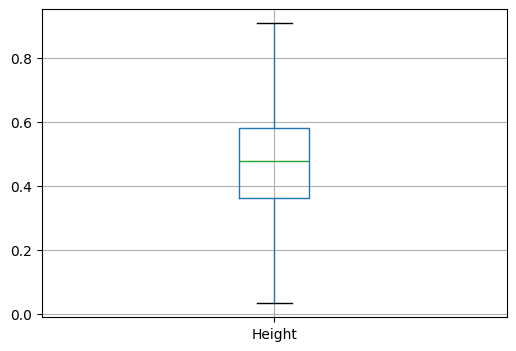

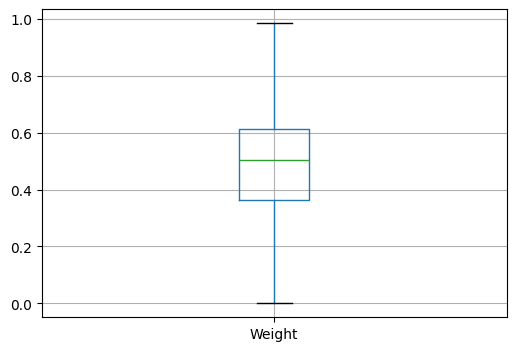

In [451]:
for col in x.columns:
  if is_numeric_dtype(x[col]):
    plt.figure(figsize=(6,4))
    x.boxplot(column=[col])

In [452]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [453]:
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((1711, 2), (1711, 1))

# Classification part

In [454]:
knn = KNeighborsClassifier()
los = LogisticRegression()

### Use KNeighborsClassifier

In [455]:
Knn_model = knn.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [456]:
y_pred = Knn_model.predict(x_test)

In [457]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], shape=(1711,))

In [458]:
knn_cla_score = accuracy_score(y_pred, y_test)
knn_cla_score

0.9246054938632379

In [459]:
los_model = los.fit(x_train, y_train)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [460]:
y_pred = los_model.predict(x_test)

In [461]:
los_score = accuracy_score(y_pred, y_test)

In [462]:
los_score

0.9187609585037989

In [463]:
los_model.score(x_test, y_test)

0.9187609585037989

### Comparison Logistic and KNN

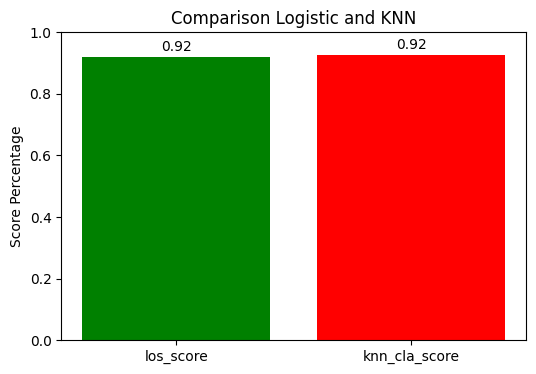

In [464]:
scores1 = [los_score,knn_cla_score]
plt.figure(figsize=(6,4))
plt.bar(['los_score','knn_cla_score'], scores1, color = ['green', 'red'])

for i, v in enumerate(scores1):
  plt.text(i, v + 0.02, round(v,2), ha = 'center')
plt.title("Comparison Logistic and KNN")
plt.ylabel("Score Percentage")
plt.ylim(0,1)
plt.show()

# Regression part

In [465]:
df = df.drop(["Gender"], axis=1)

In [466]:
df.head()

,Height,Weight
0,0.744399,0.862415
1,0.548328,0.472703
2,0.754583,0.719657
3,0.662487,0.755412
4,0.590905,0.688360


In [467]:
x = df[['Height']]
y = df[['Weight']]

In [468]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state= 42)

In [469]:
lr = LinearRegression()
knn_lr = KNeighborsRegressor()

In [470]:
lr_model = lr.fit(x_train, y_train)

In [471]:
y_pred = lr_model.predict(x_test)

In [472]:
lr_score = r2_score(y_test, y_pred)
lr_score

0.8624368321008301

In [473]:
Knn_model = knn_lr.fit(x_train, y_train)

In [474]:
y_pred = Knn_model.predict(x_test)

In [475]:
knn_lr_score = r2_score(y_test, y_pred)

In [476]:
knn_lr_score

0.8409692462707401

### Comparison linear and KNN

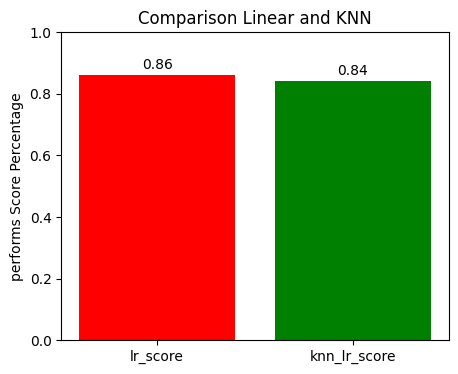

In [477]:
scores2 = [lr_score,knn_lr_score]
plt.figure(figsize=(5,4))
plt.bar(['lr_score', 'knn_lr_score'], scores2, color = ['red', 'green'])
plt.ylim(0,1)
for i, v in enumerate(scores2):
  plt.text(i, v+0.02, round(v, 2), ha = 'center')
plt.title("Comparison Linear and KNN")
plt.ylabel("performs Score Percentage")
plt.show()

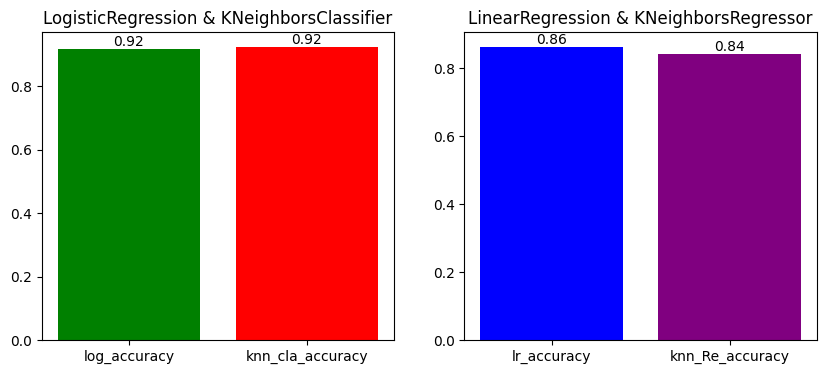

In [481]:
fig, axs = plt.subplots(1, 2, figsize = (10,4))

axs[0].bar([ 'log_accuracy','knn_cla_accuracy'], scores1, color = ['green', 'red'])
axs[0].set_title('LogisticRegression & KNeighborsClassifier')
for i, v in enumerate(scores1):
  axs[0].text(i, v+0.01, round(v,2), ha = 'center')

axs[1].bar(['lr_accuracy','knn_Re_accuracy'], scores2, color = ['blue', 'purple'])
axs[1].set_title('LinearRegression & KNeighborsRegressor')
for i, v in enumerate(scores2):
  axs[1].text(i, v + 0.01, round(v, 2), ha = 'center')